#Estimation of Obesity Levels Based on Eating Habits and Physical Condition

* Golola Charles 2024/HD05/21923U 2400721923
* Raphael Abila  2024/HD05/21912U 2400721912


#Introduction
This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

**Source of Dataset**
https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

## Common Atrributes and their Menaing

### Eating habits Attributes:
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables(FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC)
### Physical condition Attributes:
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)
### Other Attributes Include:
- Gender
- Age
- Height
- Weight
- Family history with overweight
- SMOKE
- NObesity, This is our Categorical Feature and has 7 claases including: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity   Type I, Obesity Type II and Obesity Type III

# Library Importation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import shap
shap.initjs()
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')  # for clean notebook


# Dataset Importation
We are getting data using read_csv which is pandas function

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Gcharles19/Machine-Learning/refs/heads/main/Obesity/ObesityDataSet_raw_and_data_sinthetic.csv')
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

Displaying first five rows

In [4]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

Displaying last five rows

In [5]:
df.tail()

Gender        Age    Height      Weight family_history_with_overweight  \
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O SCC       FAF       TUE  \
2106  yes   3.0  3.0  Sometimes    no  1.728139  no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130  no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193  no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339  no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513  no  1.026452  0.714137   

           CALC                 MTRANS        NObeyesdad  
2106  Sometimes  Public_Transportation  Obesity_Type_III  
2107  Sometimes  Public_Transportation  Obesity_Type_III  
2108  Sometimes  Public_Transportation  Obesity_Type_III  
2109  Sometimes  Public_Transportation  Obesity_Type_III  
2110  Sometimes  Public_Transportation  Obesity_Type_III

# Dataset Description and Data Cleaning

## Dataframe Shape.
This indicates that the dataset contain 2111 records and 17 fileds /Features

In [6]:
df.shape

(2111, 17)

## Dataframe Size

In [7]:
df.size

35887

## Renaming the Dtaset Fileds

In [8]:
new_fields = ['Gender', 'Age', 'Height', 'Weight', 'Family_history_with_overweight', 'FCOHCF', 'FCOV', 'NMM', 'COFBM', 'Smoke', 'CH2O', 'Calorie_Consump_Monitoring', 'Physical_Activity_F', 'Time_using_techno_D', 'Consumption_Alc', 'MTRANS', 'NObesity']
df.columns = new_fields

## Head of the dataset

In [9]:
df.head()

Gender   Age  Height  Weight Family_history_with_overweight FCOHCF  FCOV  \
0  Female  21.0    1.62    64.0                            yes     no   2.0   
1  Female  21.0    1.52    56.0                            yes     no   3.0   
2    Male  23.0    1.80    77.0                            yes     no   2.0   
3    Male  27.0    1.80    87.0                             no     no   3.0   
4    Male  22.0    1.78    89.8                             no     no   2.0   

   NMM      COFBM Smoke  CH2O Calorie_Consump_Monitoring  Physical_Activity_F  \
0  3.0  Sometimes    no   2.0                         no                  0.0   
1  3.0  Sometimes   yes   3.0                        yes                  3.0   
2  3.0  Sometimes    no   2.0                         no                  2.0   
3  3.0  Sometimes    no   2.0                         no                  2.0   
4  1.0  Sometimes    no   2.0                         no                  0.0   

   Time_using_techno_D Consumption_Alc                 MTRANS  \
0                  1.0              no  Public_Transportation   
1                  0.0       Sometimes  Public_Transportation   
2                  1.0      Frequently  Public_Transportation   
3                  0.0      Frequently                Walking   
4                  0.0       Sometimes  Public_Transportation   

              NObesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

Summary of dataframe

In [10]:
#Summarization of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   Family_history_with_overweight  2111 non-null   object 
 5   FCOHCF                          2111 non-null   object 
 6   FCOV                            2111 non-null   float64
 7   NMM                             2111 non-null   float64
 8   COFBM                           2111 non-null   object 
 9   Smoke                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  Calorie_Consump_Monitoring      2111 non-null   object 
 12  Physical_Activity_F             21

The Dataset has total 17 columns as described below with 2110 instances.

8 column are numerical and 9 are catagorical.

## Checking for nulls
The below shows that we dont have Null Vlaues in the features

In [14]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
Family_history_with_overweight    0
FCOHCF                            0
FCOV                              0
NMM                               0
COFBM                             0
Smoke                             0
CH2O                              0
Calorie_Consump_Monitoring        0
Physical_Activity_F               0
Time_using_techno_D               0
Consumption_Alc                   0
MTRANS                            0
NObesity                          0
dtype: int64

In [39]:
# Checking for not available values
df.isna().any()


Gender                            False
Age                               False
Height                            False
Weight                            False
Family_history_with_overweight    False
FCOHCF                            False
FCOV                              False
NMM                               False
COFBM                             False
Smoke                             False
CH2O                              False
Calorie_Consump_Monitoring        False
Physical_Activity_F               False
Time_using_techno_D               False
Consumption_Alc                   False
MTRANS                            False
NObesity                          False
dtype: bool

The output above shows that all fields are not having null values

Null Values Plot

<Axes: >

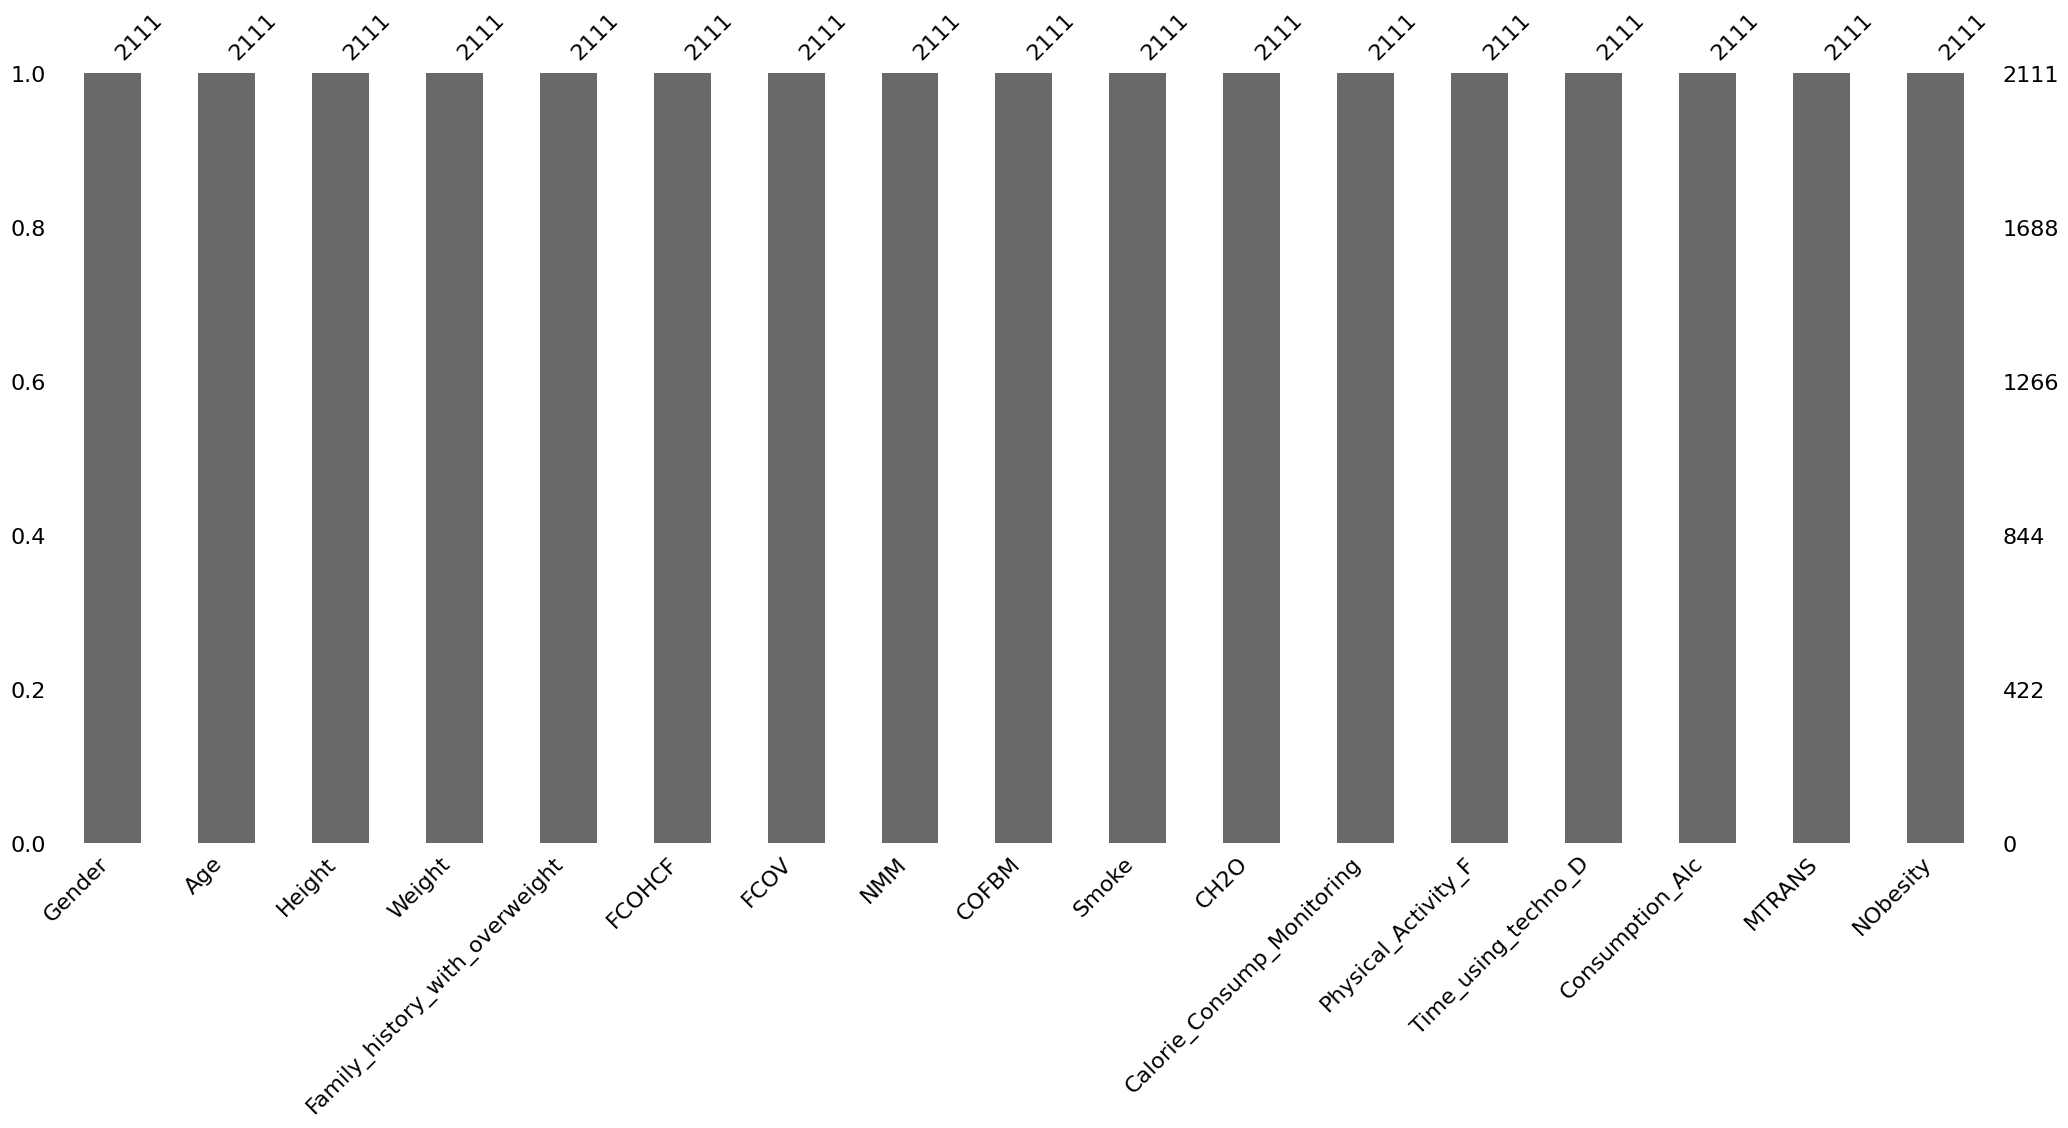

In [17]:
import missingno as msno
msno.bar(df)

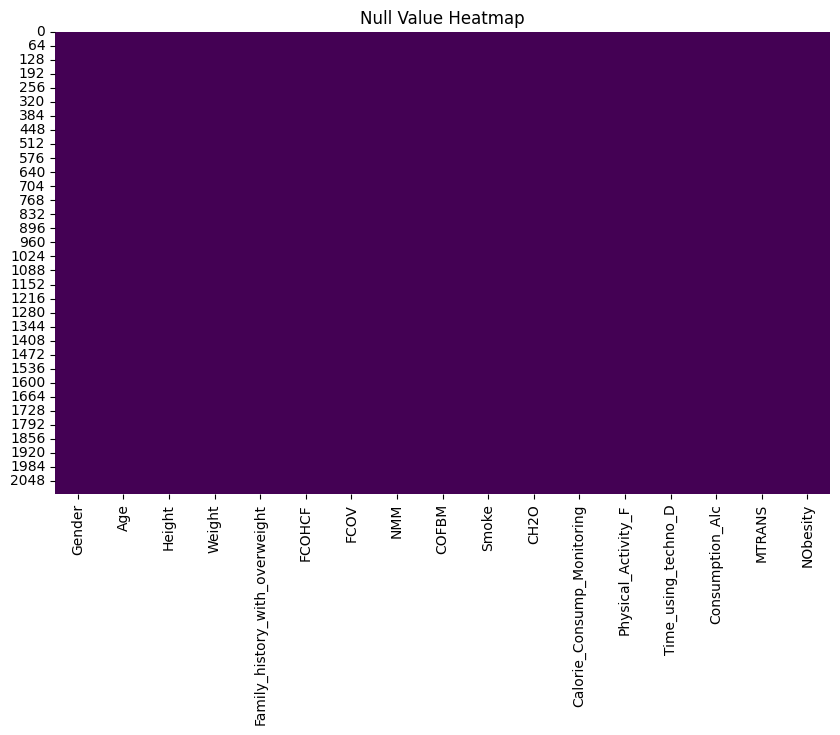

In [41]:
# Heatmap of null values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Null Value Heatmap')
plt.show()

The above Seaborn Heatmap indicates that there are no null values in the Dataframe

## Categorical Column Understanding

### Nominal
- Gender
- family_history_with_overweight  
- FCOHCF
- COFBM  
- Smoke  
- Calorie_Consump_Monitoring
- Consumption_Alc
- MTRANS  

### Ordinal
- NObesity           

## Numerical Column
### Continuous
- Age                            
- Height                        
- Weight
- FCOV                     
- NMM
- CH2O     
- Physical_Activity_F           
- Time_using_techno_D         

Statistical insights of numerical columns

In [18]:
df.describe()

Age       Height       Weight         FCOV          NMM  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O  Physical_Activity_F  Time_using_techno_D  
count  2111.000000          2111.000000          2111.000000  
mean      2.008011             1.010298             0.657866  
std       0.612953             0.850592             0.608927  
min       1.000000             0.000000             0.000000  
25%       1.584812             0.124505             0.000000  
50%       2.000000             1.000000             0.625350  
75%       2.477420             1.666678             1.000000  
max       3.000000             3.000000             2.000000

In [19]:
df.describe(include=object)

Gender Family_history_with_overweight FCOHCF      COFBM Smoke  \
count    2111                           2111   2111       2111  2111   
unique      2                              2      2          4     2   
top      Male                            yes    yes  Sometimes    no   
freq     1068                           1726   1866       1765  2067   

       Calorie_Consump_Monitoring Consumption_Alc                 MTRANS  \
count                        2111            2111                   2111   
unique                          2               4                      5   
top                            no       Sometimes  Public_Transportation   
freq                         2015            1401                   1580   

              NObesity  
count             2111  
unique               7  
top     Obesity_Type_I  
freq               351

Basic on the  statistical analysis it is found that skewness is present in some of the columns like Age, Weight, FCOV, NMM.

Average age and weight of population is 24.31 and 86.58.

## **Unique values of catagorical column**

In [20]:
df['Gender'].value_counts()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

In [21]:
df['Family_history_with_overweight'].value_counts()

Family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

In [22]:
df['COFBM'].value_counts()

COFBM
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [23]:
df['Smoke'].value_counts()

Smoke
no     2067
yes      44
Name: count, dtype: int64

In [24]:
df['Calorie_Consump_Monitoring'].value_counts()

Calorie_Consump_Monitoring
no     2015
yes      96
Name: count, dtype: int64

In [25]:
df['Consumption_Alc'].value_counts()

Consumption_Alc
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [26]:
df['MTRANS'].value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [27]:
df['NObesity'].value_counts()

NObesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

The target column contains total seven catagories and all this data is well balanced.




## Detecting Outliers

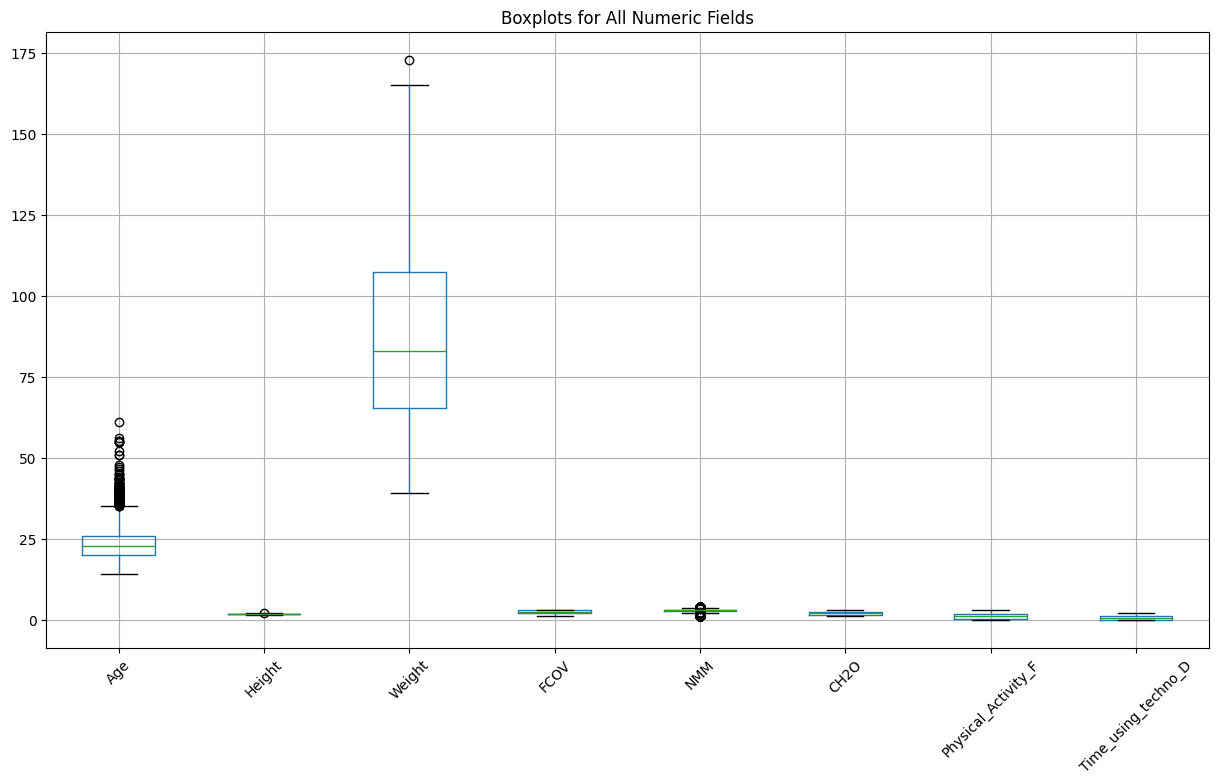

In [34]:
# plt.figure(figsize=(10, 6))
df.select_dtypes(include='number').boxplot(figsize=(15, 8))
plt.title('Boxplots for All Numeric Fields')
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()


Basing on the this Box Plot,
It semes we have some outliers in the fields below

*   Age: A dense spread of values with a significant number of outliers above the upper whisker, suggesting extreme ages in the dataset
*   Weight: It has very compact range of values with a few outliers.
*   Numbe rof Meals Taken NMM
* Height



## Handling Outliers

In [35]:
for cols in df.columns:
    if df[cols].dtype == object :       # we are only focussing on Numerical Fields
        continue
    else:
        Q1 = df[cols].quantile(q=0.25)
        Q3 = df[cols].quantile(q=0.75)
        iqr = Q3-Q1

        low = Q1 - 1.5*(Q3-Q1)
        high = Q3 + 1.5*(Q3-Q1)
        df.loc[(df[cols]<low) | (df[cols]>high),cols] = df[cols].median()   # Replacing outliers with median

Outliers significantly affect the process of estimating avearage and standard deviation resulting in overestimated or underestimated values.

therefore results of machine learning algorithm depends on handling of outliers.
 In the above code we have replaced outliers with median values of that column.

## Handling missing values

In [ ]:

# Drop missing values - Check
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis

## Multivariate Analysis

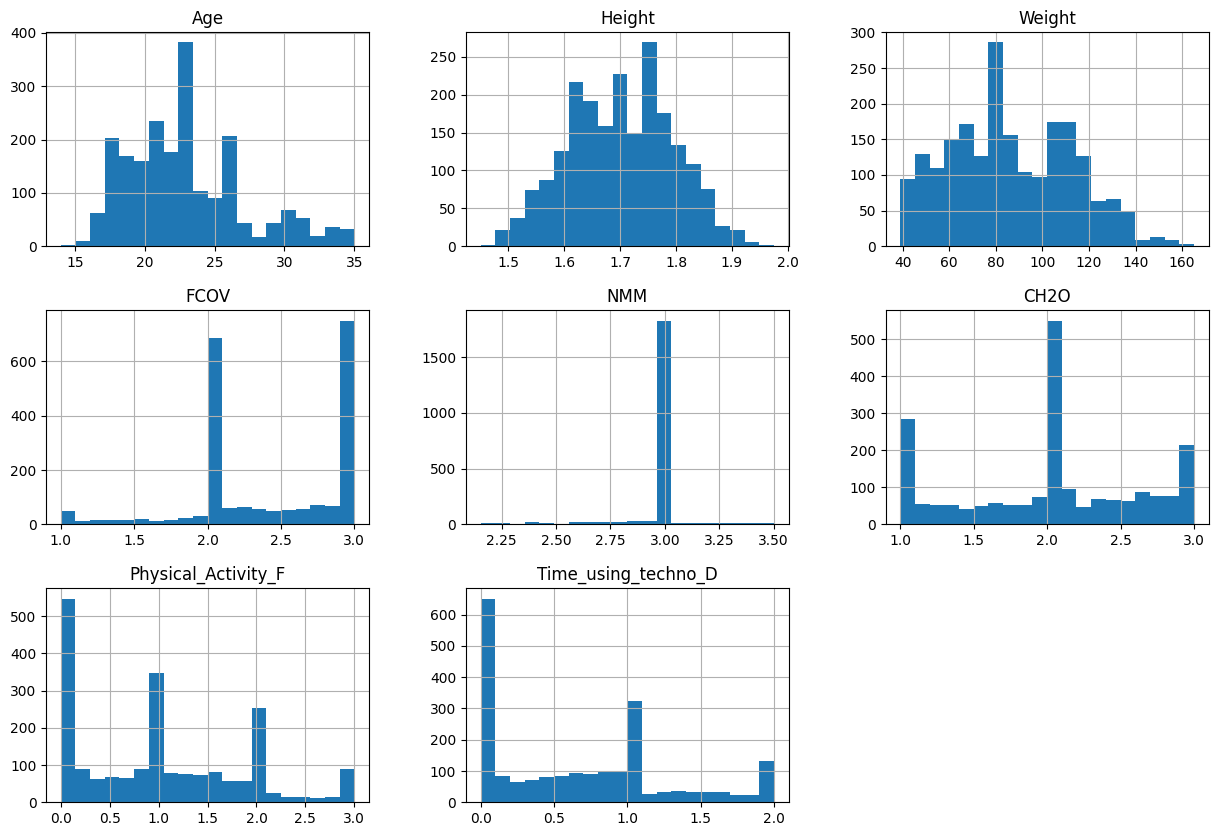

In [36]:
#  histograms
df.hist(figsize=(15,10), bins=20)
plt.show()

**Findings**,
- we have maximum number of people between age range of 20-30.
- Physical activity frequency is varying with very less people working out daily.
- more than 1200 people prefer three main meals.
- Frequency of consumpion of vegetables is high.

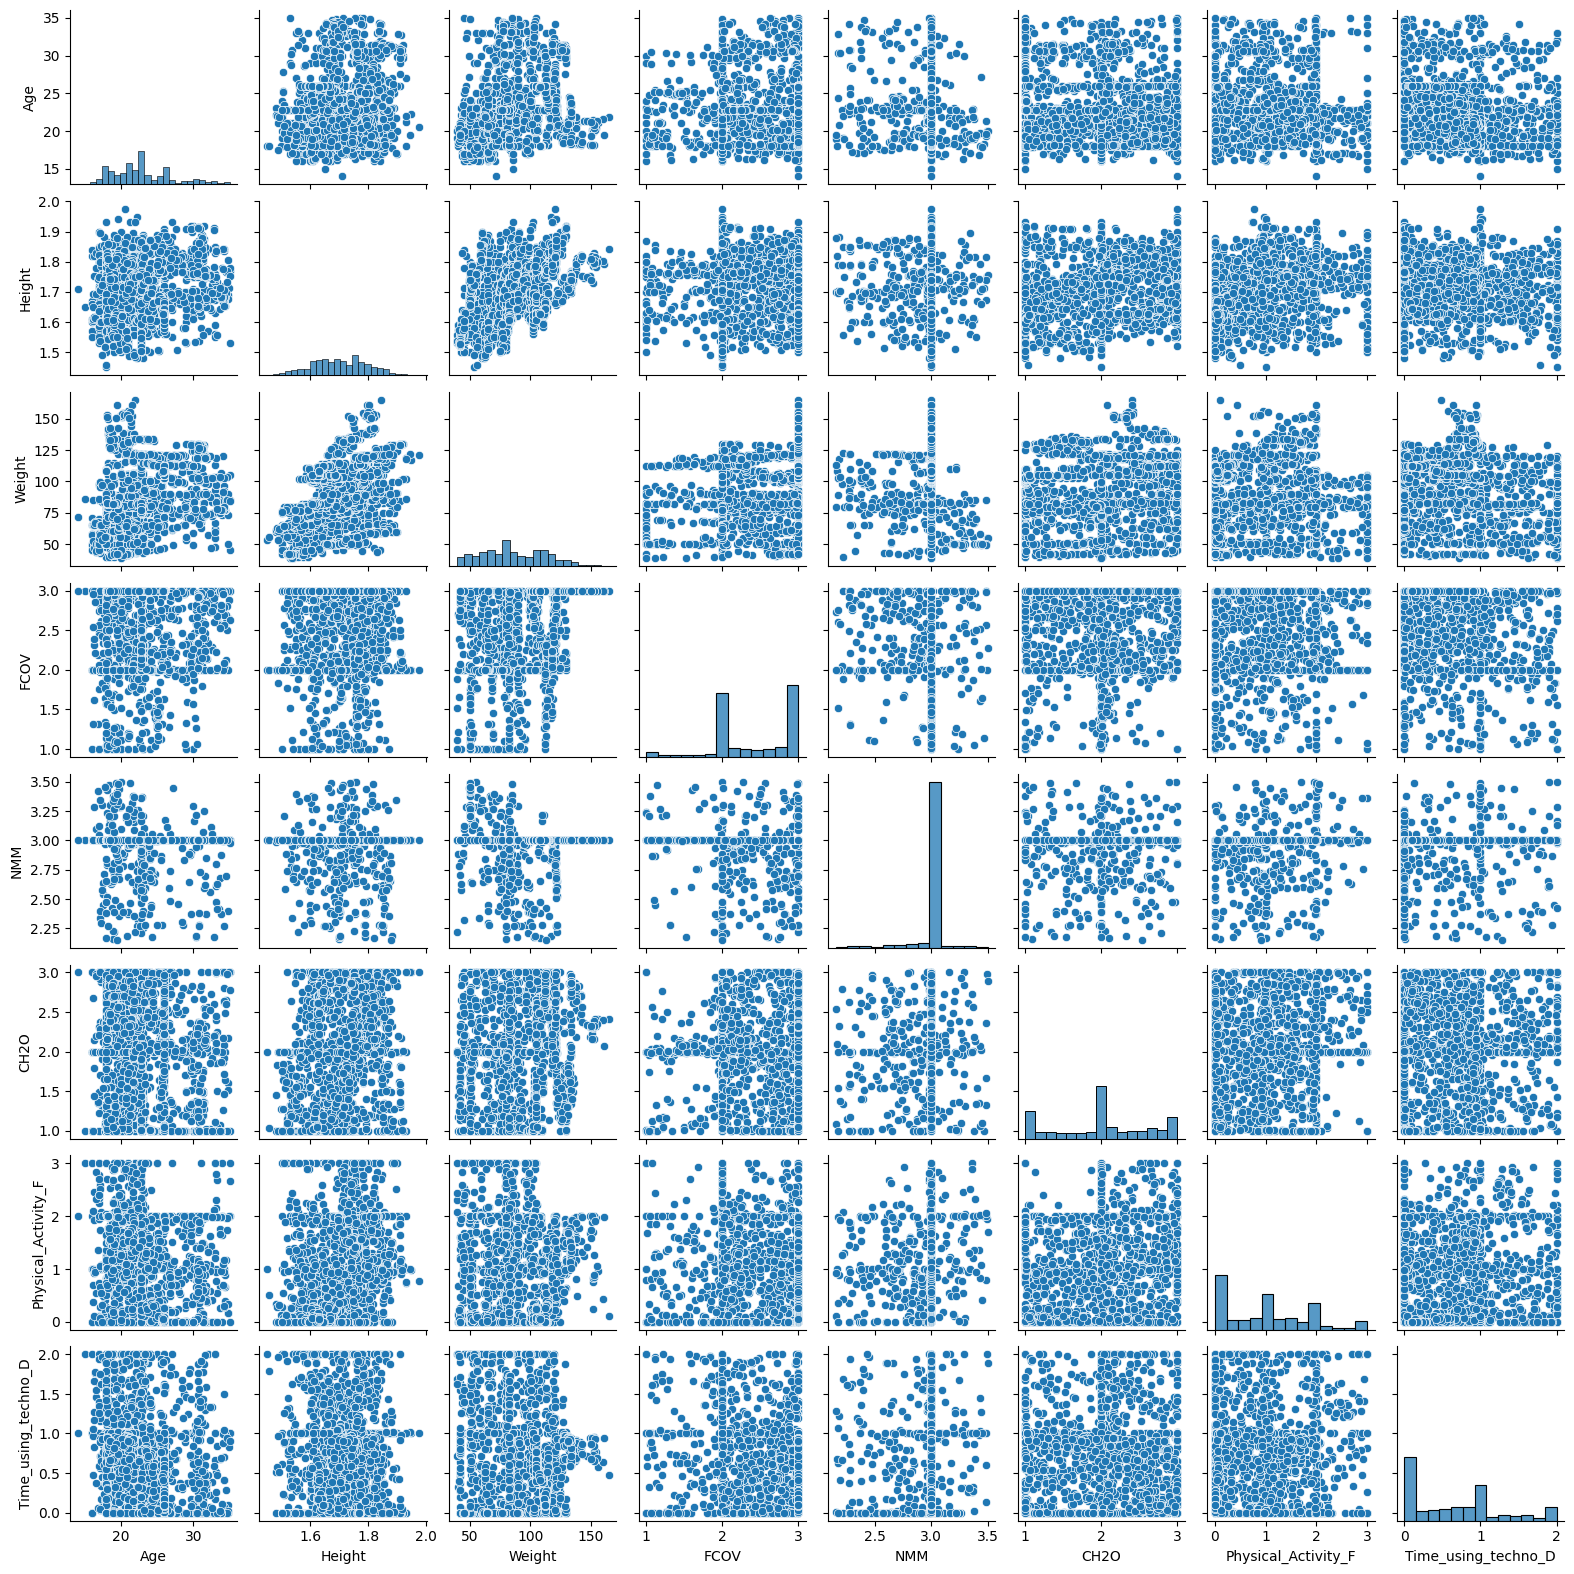

In [37]:
# Pairwise relationships in a dataset
sns.pairplot(df, height=2)
plt.show()

Bivariate Analysis

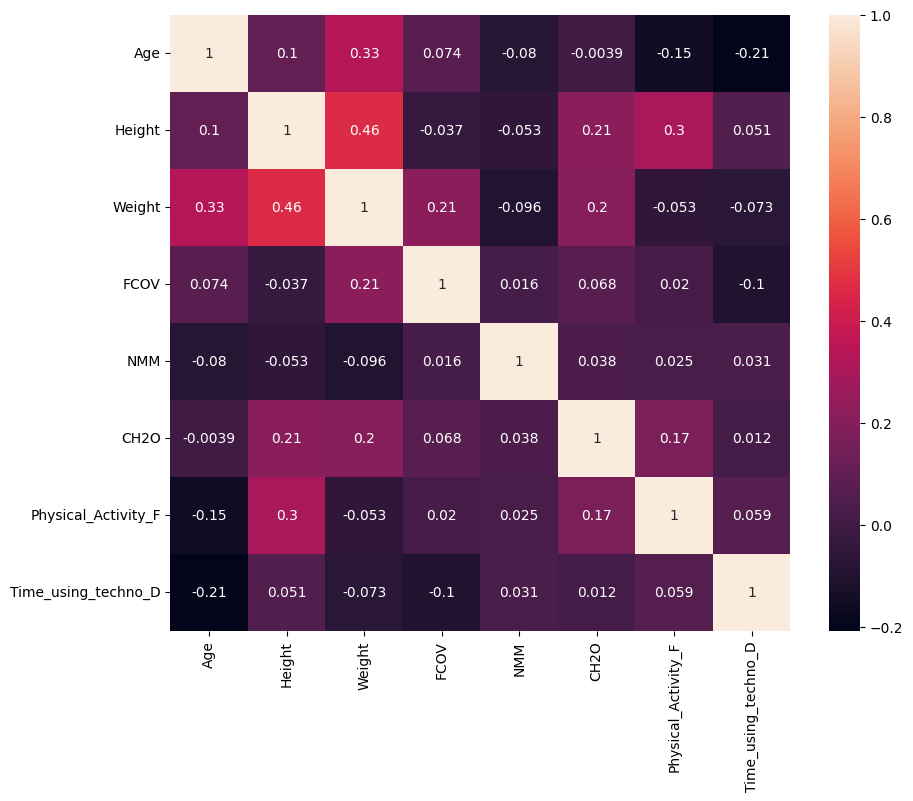

In [38]:
# Heatmap of correlation matrix
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

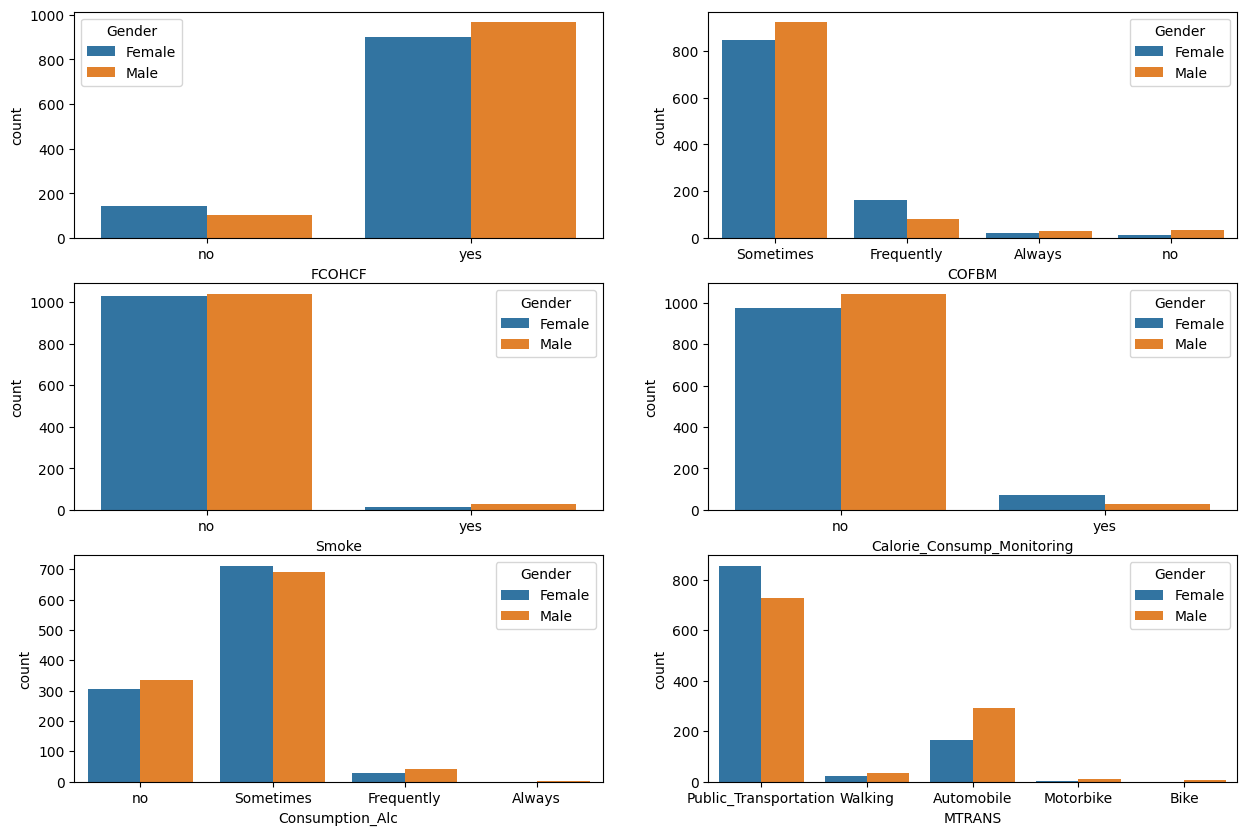

In [42]:
# Countplot for catagorical atributes
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.countplot(data= df, x ='FCOHCF',hue='Gender')
plt.subplot(3,2,2)
sns.countplot(data= df, x ='COFBM',hue='Gender')
plt.subplot(3,2,3)
sns.countplot(data= df, x ='Smoke',hue='Gender')
plt.subplot(3,2,4)
sns.countplot(data= df, x ='Calorie_Consump_Monitoring',hue='Gender')
plt.subplot(3,2,5)
sns.countplot(data= df, x ='Consumption_Alc',hue='Gender')
plt.subplot(3,2,6)
sns.countplot(data= df, x ='MTRANS',hue='Gender')
plt.show()

Basing on the above
- Frequency of consumtion of high calorie food is more in both males and females.
- Both males and females preffer public transportation.
- very small quantity of population monitors calorie intake.
- out of all population more than 1600 people like to eat between their main meals.

**Scatterplot of how obesity varies with Physical activity and Age**

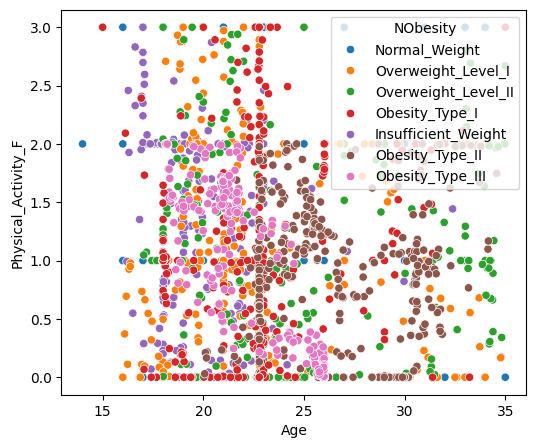

In [43]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age', y='Physical_Activity_F',data=df, hue = 'NObesity')
plt.show()

- People who are not doing any physical activity are suffering from both overweight and obesity.
- Obesity type III is most frequent in young population between age 15-30.
- We can see that obesity type II is only present in people having age avove 20.

**Variation of obesity according to Weight and Age**

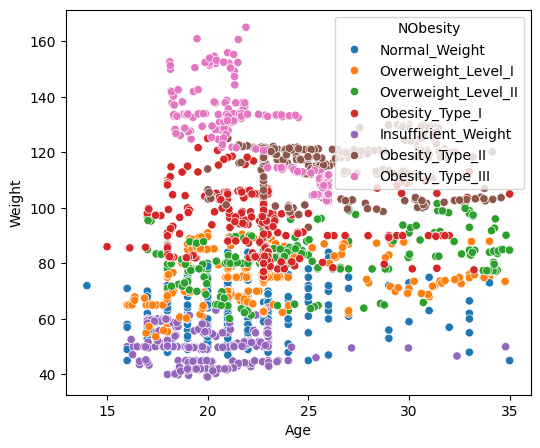

In [44]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age', y='Weight',data=df, hue = 'NObesity')
plt.show()

**Variation of obesity according to Weight and Height**

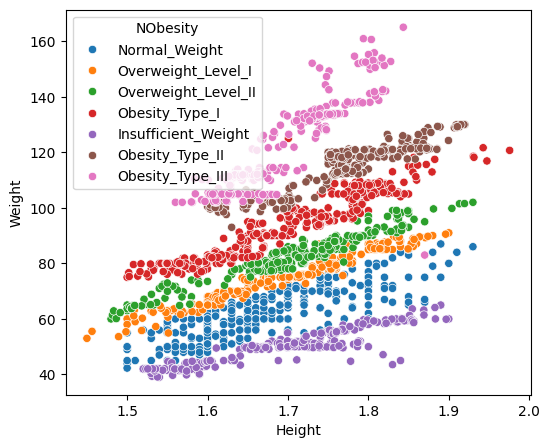

In [45]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Height', y='Weight',data=df, hue = 'NObesity')
plt.show()

###Target Distribution

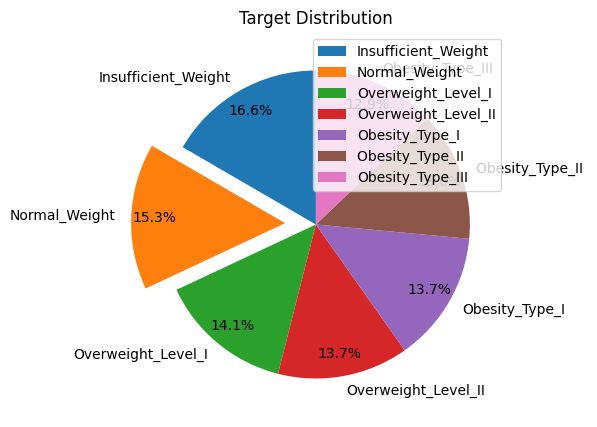

In [46]:
# Pie chart of target variable
plt.figure(figsize=(5, 5))
myexplode = [ 0, 0.2, 0, 0, 0, 0, 0]
plt.pie(df['NObesity'].value_counts(), labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II ', 'Obesity_Type_III'],
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=myexplode)
plt.legend(loc='upper right')
plt.title("Target Distribution")
plt.show()

The distribution of target variables is balanced.

# Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.select_dtypes(include=['int','float']).columns] = scaler.fit_transform(df[df.select_dtypes(include=['int','float']).columns])  # Selecting only numerical features
df.head()

Gender       Age    Height    Weight Family_history_with_overweight FCOHCF  \
0  Female -0.472046 -0.887858 -0.873602                            yes     no   
1  Female -0.472046 -1.963525 -1.179920                            yes     no   
2    Male  0.010642  1.048343 -0.375836                            yes     no   
3    Male  0.976018  1.048343  0.007060                             no     no   
4    Male -0.230702  0.833210  0.114272                             no     no   

       FCOV       NMM      COFBM Smoke      CH2O Calorie_Consump_Monitoring  \
0 -0.788364  0.186051  Sometimes    no -0.007810                         no   
1  1.082164  0.186051  Sometimes   yes  1.636552                        yes   
2 -0.788364  0.186051  Sometimes    no -0.007810                         no   
3  1.082164  0.186051  Sometimes    no -0.007810                         no   
4 -0.788364  0.186051  Sometimes    no -0.007810                         no   

   Physical_Activity_F  Time_using_techno_D Consumption_Alc  \
0            -1.186977             0.554211              no   
1             2.328908            -1.090505       Sometimes   
2             1.156947             0.554211      Frequently   
3             1.156947            -1.090505      Frequently   
4            -1.186977            -1.090505       Sometimes   

                  MTRANS             NObesity  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

From the code above, we are performing standardization on the numerical features in  the DataFrame

## Catagorical features
Most of the  machiche learning algorithm cannot understand catagorical values.

Here, we are converting catagorical features to machine understandable values.

In [53]:
df.dtypes=='object'

Gender                             True
Age                               False
Height                            False
Weight                            False
Family_history_with_overweight     True
FCOHCF                             True
FCOV                              False
NMM                               False
COFBM                              True
Smoke                              True
CH2O                              False
Calorie_Consump_Monitoring         True
Physical_Activity_F               False
Time_using_techno_D               False
Consumption_Alc                    True
MTRANS                             True
NObesity                           True
dtype: bool

In [54]:
df['Gender'], c =pd.factorize(df['Gender'])
df['Family_history_with_overweight'], c = pd.factorize(df['Family_history_with_overweight'])
df['FCOHCF'], c = pd.factorize(df['FCOHCF'])
df['Smoke'], c = pd.factorize(df['Smoke'])
df['Calorie_Consump_Monitoring'], c = pd.factorize(df['Calorie_Consump_Monitoring'])

In [55]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['NObesity'] = le.fit_transform(df['NObesity'])
df['COFBM'] = le.fit_transform(df['COFBM'])
df['Consumption_Alc'] = le.fit_transform(df['Consumption_Alc'])
df['MTRANS'] = le.fit_transform(df['MTRANS'])

In [57]:
df['Gender']

0       0
1       0
2       1
3       1
4       1
       ..
2106    0
2107    0
2108    0
2109    0
2110    0
Name: Gender, Length: 2087, dtype: int64

#Feature Selection

In [58]:
# Performing feature selection using Decision Tree
from sklearn.tree import DecisionTreeClassifier
#FS_dt = DecisionTreeClassifier(max_depth=10).fit(X, y)

# Model Development

## Data Splitting

In [101]:
X = df.drop(columns='NObesity')
y = df['NObesity']
X = X.select_dtypes(include=['int', 'float'])
categorical_columns = X.select_dtypes(include=['object']).columns


## Feature Importance and Selection

Feature Importances DataFrame Shape: (16, 2)


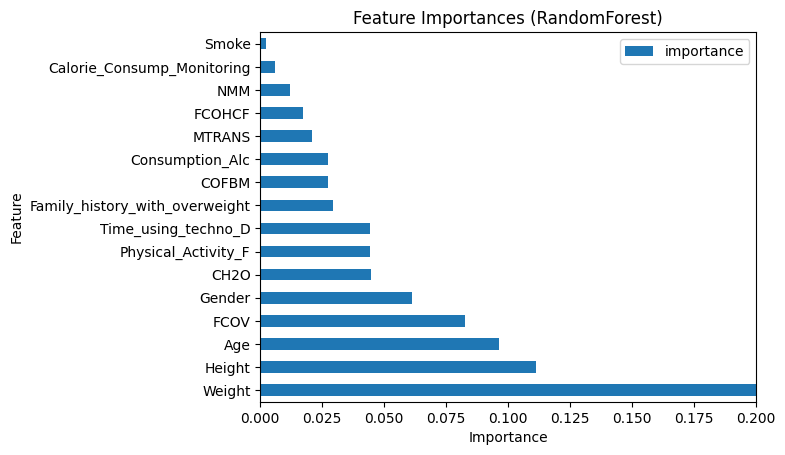

In [113]:
rfc = RandomForestClassifier(random_state=121)
rfc.fit(X, y)

# Extract feature importances into a DataFrame
features_rfc = X.columns
key_features_rfc = pd.DataFrame(rfc.feature_importances_, features_rfc)
key_features_rfc.reset_index(inplace=True)
key_features_rfc.columns = ['feature', 'importance']

print(f"Feature Importances DataFrame Shape: {key_features_rfc.shape}")

key_features_rfc.set_index('feature').sort_values('importance', ascending=False)[:30].plot(
    kind="barh",
    xlim=(0, 0.2),
    title="Feature Importances (RandomForest)"
)

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Most Influential Features:

Weight is the most important feature in predicting obesity (NObesity) in this model.
Height also plays an important role in the model’s predictions.
Other Significant Features:
Age and FCOF, they have considerable importance in predicting the target.
Moderately Important Features:

Physical_Activity_F, Time_using_techno_D, and Family_history_with_overweight have moderate importance in the model.
Less Important Features:
Smoke, Calorie_Consump_Monitoring, NMM, and FCOHCF have are less influential in predicting the target variable compared to features like Weight or Age.

## Feature Selection

In [124]:
# Creating a dataframe of feature_importances_
feature_select = pd.DataFrame()
feature_select['Features'] = X.columns
feature_select['feature_importances_'] = FS_dt.feature_importances_
feature_select.sort_values(by='feature_importances_', ascending=False)

Features  feature_importances_
3                           Weight              0.473953
2                           Height              0.221192
0                           Gender              0.161894
1                              Age              0.041174
14                 Consumption_Alc              0.024145
5                           FCOHCF              0.019895
6                             FCOV              0.018658
8                            COFBM              0.011361
10                            CH2O              0.006945
15                          MTRANS              0.003912
13             Time_using_techno_D              0.003887
9                            Smoke              0.003830
12             Physical_Activity_F              0.003419
4   Family_history_with_overweight              0.002397
7                              NMM              0.002205
11      Calorie_Consump_Monitoring              0.001132

In [125]:
l = ['Weight','Height','Gender','Age','Consumption_Alc','FCOHCF','FCOV','COFBM','Physical_Activity_F','MTRANS','CH2O','Time_using_techno_D','Smoke']
scaled_x = X

In [126]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(scaled_x, y, test_size=0.2, random_state=40)
# Further split the training data into 70% training and 30% validation
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.3, random_state=40)

## Model Implementaion

### Model 1 XGBoost

In [137]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

model = xgb.XGBClassifier(
    n_estimators=100,            # Number of trees in the model
    learning_rate=0.1,           # Step size shrinkage to prevent overfitting
    max_depth=3,                 # Maximum depth of each tree
    random_state=42,             # For reproducibility
    use_label_encoder=False,     # Avoid warnings related to label encoding
    eval_metric='mlogloss'       # Multi-class log loss metric
)
# Train the model
model.fit(train_X, train_y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Make Predictions:

In [138]:
val_predictions = model.predict(val_X)

In [193]:
xgboost_accuracy = accuracy_score(val_y, val_predictions)
print(f"Accuracy: {xgboost_accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(val_y, val_predictions))

print("\nClassification Report:")
print(classification_report(val_y, val_predictions))


Accuracy: 0.9441

Confusion Matrix:
[[63  2  0  0  0  0  0]
 [ 3 62  0  0  0  3  0]
 [ 0  0 77  0  0  2  1]
 [ 0  0  1 76  0  0  0]
 [ 0  1  0  0 78  0  0]
 [ 0  3  0  0  0 59  7]
 [ 0  0  4  0  0  1 58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        65
           1       0.91      0.91      0.91        68
           2       0.94      0.96      0.95        80
           3       1.00      0.99      0.99        77
           4       1.00      0.99      0.99        79
           5       0.91      0.86      0.88        69
           6       0.88      0.92      0.90        63

    accuracy                           0.94       501
   macro avg       0.94      0.94      0.94       501
weighted avg       0.94      0.94      0.94       501



#### Feature Importance


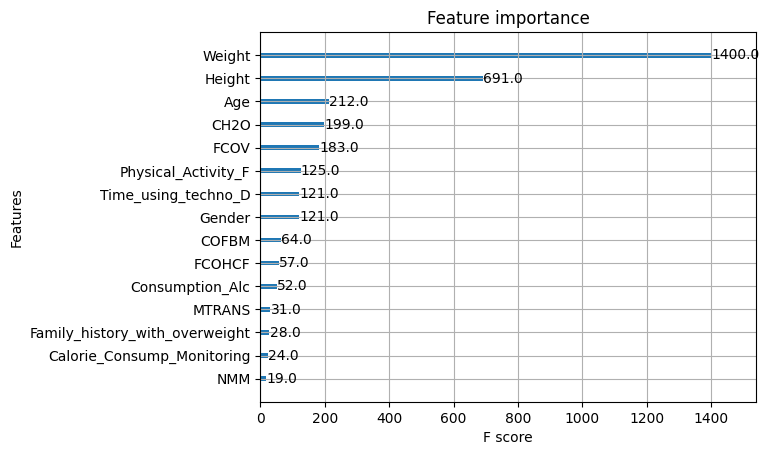

In [140]:
xgb.plot_importance(model)
plt.show()

#### Expalinability

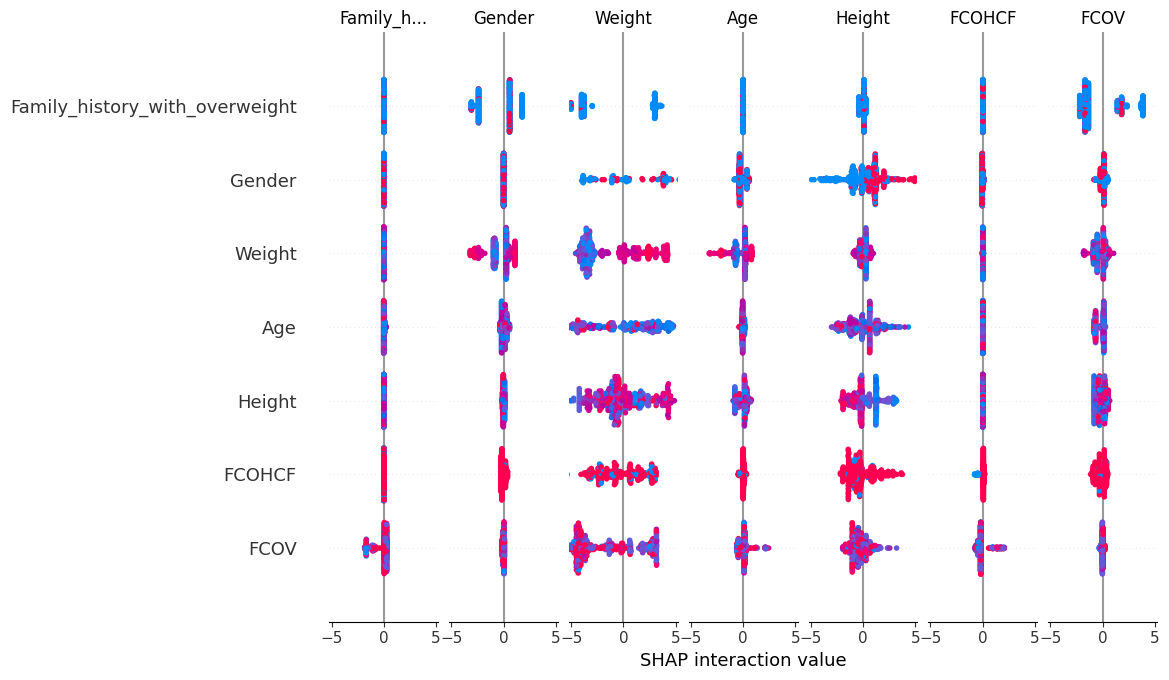

In [144]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Initialize the model
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
model.fit(train_X, train_y)
explainer = shap.TreeExplainer(model)


shap_values = explainer.shap_values(val_X)
shap.summary_plot(shap_values, val_X)

# For a single instance prediction (Local Explanation)
shap.initjs()
# shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], val_X.iloc[0,:])


* The model heavily relies on features eg Family_history_with_overweight, Gender, and Weight to make predictions.
* Family_history_with_overweight emerges as the most important feature.
* Features like Weight, Age, and Height demonstrate wide spreads in SHAP interaction values, indicating that their influence on the model’s predictions is strongly.
* Features contribute both positively and negatively to the model predictions. For example, Height and FCOHCF show balanced interactions, which suggests that their influence on the outcome can vary depending on their values or combinations with other features.

### Model 2 - Logistic Regression

In [147]:
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)  # Fit and transform the training data
test_X_scaled = scaler.transform(test_X)  # Only transform the test data (to avoid data leakage)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(train_X_scaled, train_y)

LogisticRegression(max_iter=1000, random_state=42)

#### Predictions

In [152]:

predictions = log_reg.predict(test_X_scaled)

#### Model Evaluation

In [194]:

lr_accuracy = accuracy_score(test_y, predictions)
conf_matrix = confusion_matrix(test_y, predictions)
class_report = classification_report(test_y, predictions)

print(f"Accuracy: {lr_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8636363636363636
Confusion Matrix:
[[46  1  0  0  0  0  0]
 [ 8 43  0  0  0  5  2]
 [ 0  0 65  7  1  1  4]
 [ 0  0  0 59  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 0  4  0  0  0 36  9]
 [ 0  0 11  0  0  4 50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        47
           1       0.90      0.74      0.81        58
           2       0.86      0.83      0.84        78
           3       0.89      1.00      0.94        59
           4       0.98      1.00      0.99        62
           5       0.78      0.73      0.76        49
           6       0.77      0.77      0.77        65

    accuracy                           0.86       418
   macro avg       0.86      0.87      0.86       418
weighted avg       0.86      0.86      0.86       418



#### Exlainability

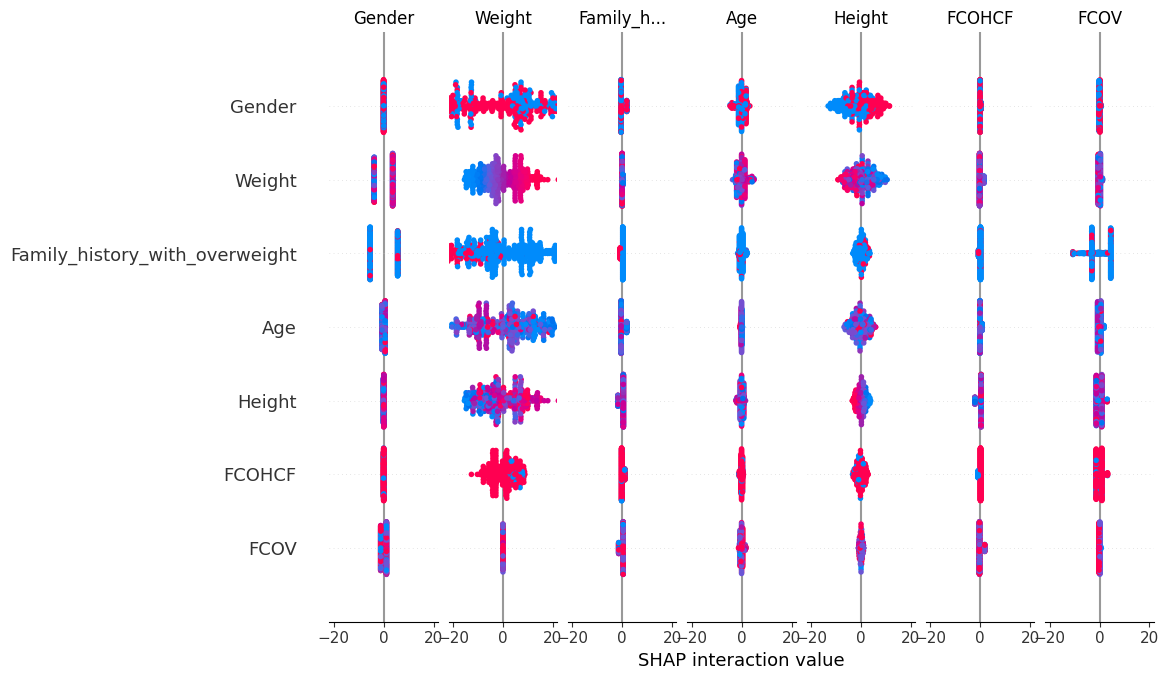

In [168]:
explainer = shap.LinearExplainer(log_reg, train_X_scaled, feature_names=train_X.columns)
shap_values = explainer.shap_values(test_X_scaled)
shap.summary_plot(shap_values, test_X_scaled, feature_names=test_X.columns)
# Visualize SHAP force plots for all classes and the first sample
test_X_scaled = scaler.transform(test_X)
shap.initjs()
# shap.force_plot(explainer.expected_value[1], shap_values[1][0], test_X_scaled[0], feature_names=test_X.columns)

### Model 3 - Decision Tree

In [173]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=4)

In [174]:
# Training the model
dt_model.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=4)

In [175]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' % dt_model.score(train_X, train_y))
print('Testing score is:- %0.2f' % dt_model.score(test_X, test_y))

Training score is:- 0.78
Testing score is:- 0.78


In [176]:
# Predicting the model
pred_dt = dt_model.predict(test_X)

In [177]:
# Determining accuracy of model using confusion matrix
result_dt = confusion_matrix(test_y, pred_dt)
result_dt

array([[42,  5,  0,  0,  0,  0,  0],
       [ 6, 31,  0,  0,  0, 17,  4],
       [ 0,  0, 58,  1,  0,  2, 17],
       [ 0,  0,  7, 52,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  6,  0,  0,  0, 27, 16],
       [ 0,  0,  3,  0,  0,  7, 55]])

In [178]:
# Accuracy using accuracy_score
dt_model_accuarcy = accuracy_score(test_y, pred_dt)
print('dt_model_accuarcy:- %0.2f' % dt_model_accuarcy)

dt_model_accuarcy:- 0.78


In [179]:
dt_model_CR = classification_report(test_y, pred_dt)
print(dt_model_CR)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.74      0.53      0.62        58
           2       0.85      0.74      0.79        78
           3       0.98      0.88      0.93        59
           4       1.00      1.00      1.00        62
           5       0.51      0.55      0.53        49
           6       0.60      0.85      0.70        65

    accuracy                           0.78       418
   macro avg       0.79      0.78      0.78       418
weighted avg       0.80      0.78      0.78       418



Deceision Tree Model XAi Using Shap

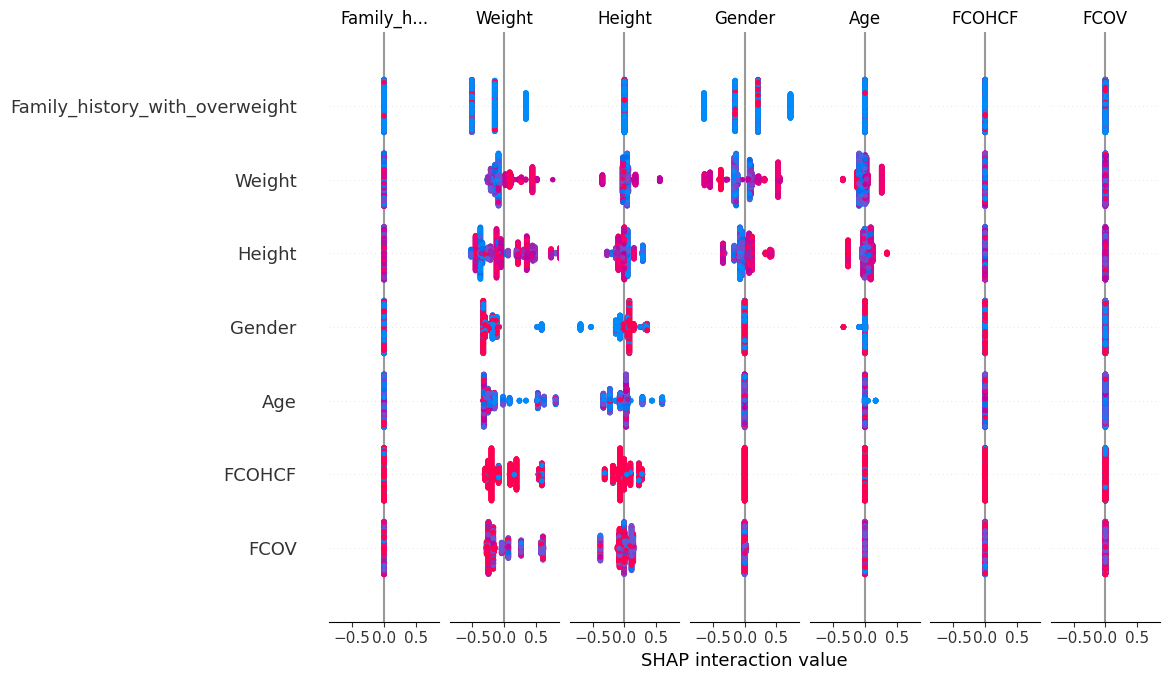

In [180]:
explainer = shap.Explainer(dt_model, train_X)

# Calculate SHAP values
shap_values = explainer(train_X)
shap.summary_plot(shap_values.values, train_X)

### Model 4 - Supprt Vector Classification

In [181]:
from sklearn.svm import SVC
# Creating the model
svc_model = SVC()
svc_model.fit(train_X, train_y)

SVC()

In [182]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' % svc_model.score(train_X, train_y))
print('Testing score is:- %0.2f' % svc_model.score(test_X, test_y))

Training score is:- 0.92
Testing score is:- 0.87


In [183]:
# Predicting the model
pred_svc = svc_model.predict(test_X)

In [184]:
# Determining accuracy of model using confusion matrix
result_svc = confusion_matrix(test_y, pred_svc)
result_svc

array([[45,  1,  0,  0,  0,  1,  0],
       [ 8, 42,  0,  0,  0,  7,  1],
       [ 0,  1, 72,  3,  0,  0,  2],
       [ 0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  4,  0,  0,  0, 33, 12],
       [ 0,  1,  3,  1,  0,  8, 52]])

In [185]:
# Accuracy using accuracy_score
svc_model_accuarcy = accuracy_score(test_y, pred_svc)
print('dt_model_accuarcy:-%0.2f' % svc_model_accuarcy)

dt_model_accuarcy:-0.87


In [186]:
svc_model_CR = classification_report(test_y, pred_svc)
print(svc_model_CR)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        47
           1       0.86      0.72      0.79        58
           2       0.96      0.92      0.94        78
           3       0.94      1.00      0.97        59
           4       1.00      1.00      1.00        62
           5       0.67      0.67      0.67        49
           6       0.78      0.80      0.79        65

    accuracy                           0.87       418
   macro avg       0.86      0.87      0.86       418
weighted avg       0.87      0.87      0.87       418



### Model 5 - Random Forest

In [187]:
from sklearn.ensemble import RandomForestClassifier
# Creating the model
rf_model = RandomForestClassifier()
# Training the model
rf_model.fit(train_X, train_y)

RandomForestClassifier()

In [188]:
# Predicting the model
pred_rf = rf_model.predict(test_X)

In [189]:
# Determining accuracy of model using confusion matrix
result_rf = confusion_matrix(test_y, pred_rf)
result_rf

array([[44,  3,  0,  0,  0,  0,  0],
       [ 3, 51,  0,  0,  0,  3,  1],
       [ 0,  2, 74,  0,  0,  1,  1],
       [ 0,  0,  2, 57,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0],
       [ 0,  3,  0,  0,  0, 44,  2],
       [ 0,  3,  0,  0,  0,  0, 62]])

In [197]:
rf_accuracy = accuracy_score(test_y, pred_rf)
print('The accuracy of the model is :-%0.2f' %rf_accuracy)

The accuracy of the model is :-0.94


In [191]:
# Classification report
rf_model_CR = classification_report(test_y, pred_rf)
print(rf_model_CR)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        47
           1       0.82      0.88      0.85        58
           2       0.97      0.95      0.96        78
           3       1.00      0.97      0.98        59
           4       1.00      1.00      1.00        62
           5       0.92      0.90      0.91        49
           6       0.94      0.95      0.95        65

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



#### Explainability

In [206]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(test_X)

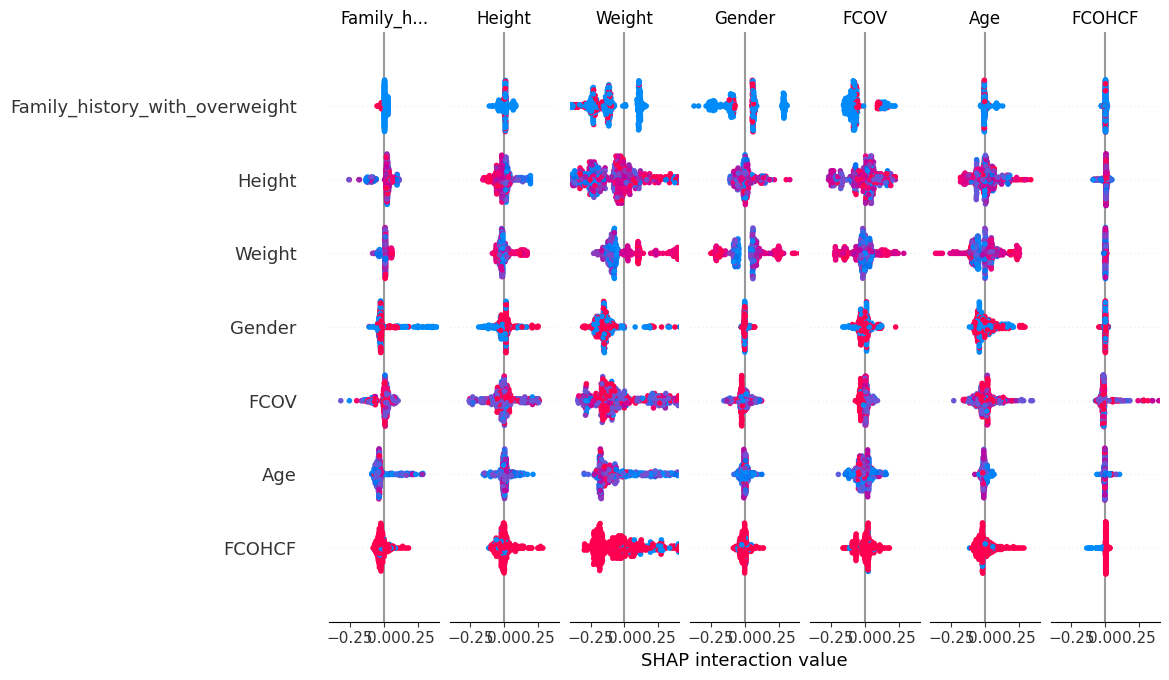

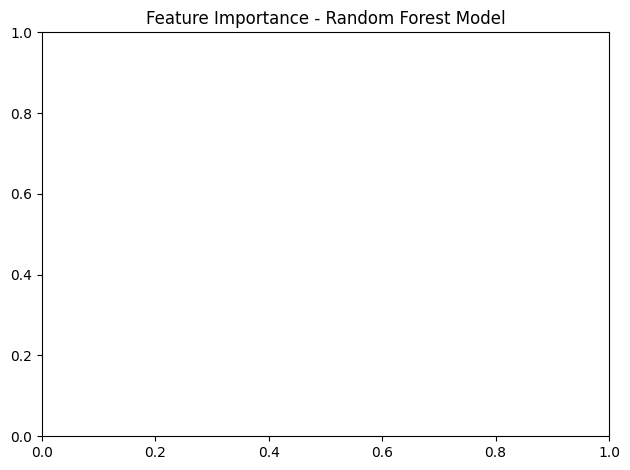

In [207]:
shap.summary_plot(shap_values, test_X, plot_type="bar")
plt.title("Feature Importance - Random Forest Model")
plt.tight_layout()
plt.show()

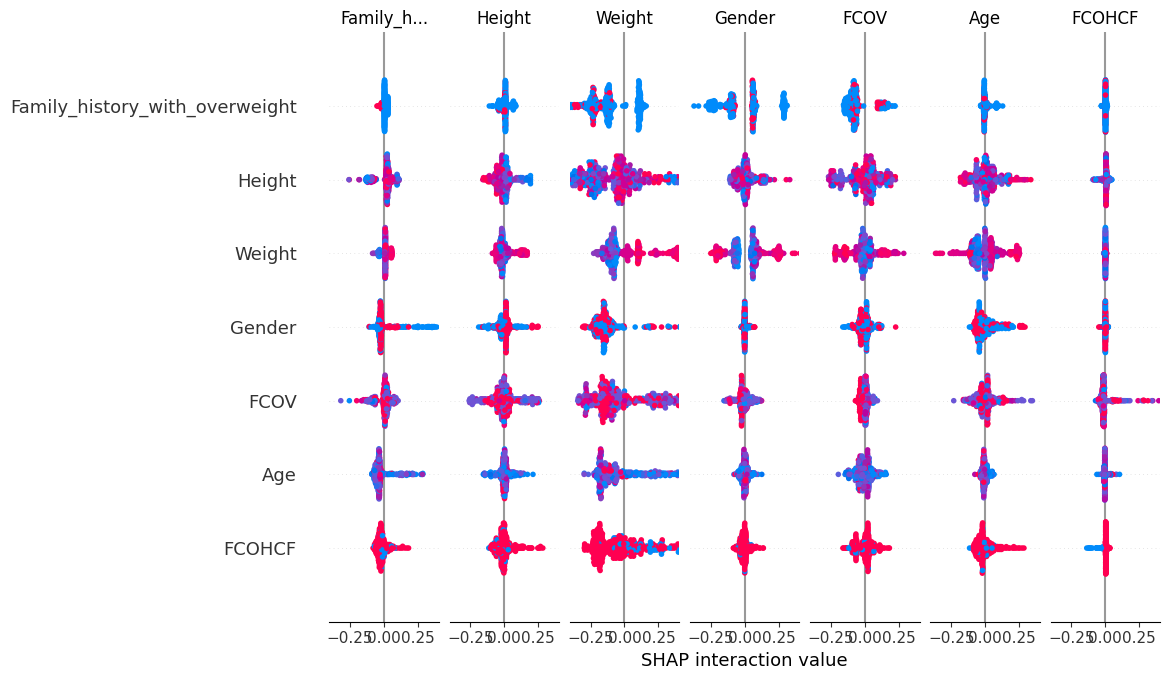

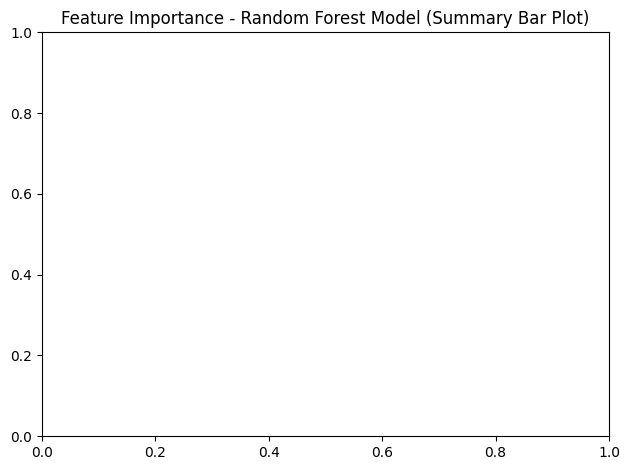

In [210]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(test_X)

shap.summary_plot(shap_values, test_X, plot_type="bar")
plt.title("Feature Importance - Random Forest Model (Summary Bar Plot)")
plt.tight_layout()
plt.show()


### Model Performancy

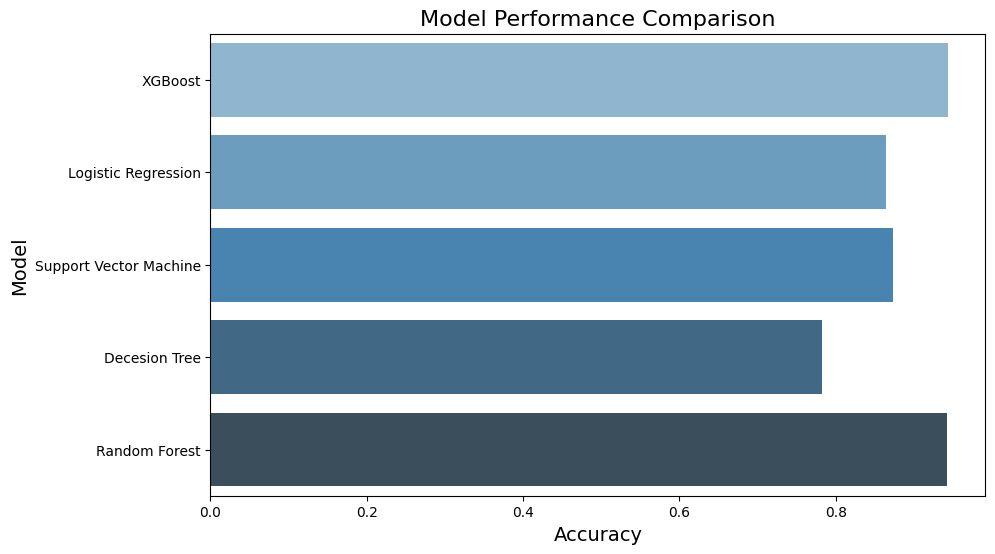

In [204]:
model_names = ['XGBoost', 'Logistic Regression', 'Support Vector Machine','Decesion Tree','Random Forest']
accuracies = [xgboost_accuracy, lr_accuracy, svc_model_accuarcy, dt_model_accuarcy, rf_accuracy]

performance_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=performance_df, palette='Blues_d')
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()
